[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


k = 2, silhouette score = 0.0287
k = 3, silhouette score = 0.0317
k = 4, silhouette score = 0.0466
k = 5, silhouette score = 0.0435
k = 6, silhouette score = 0.0412
k = 7, silhouette score = 0.0522
k = 8, silhouette score = 0.0570
k = 9, silhouette score = 0.0615
k = 10, silhouette score = 0.0608
k = 11, silhouette score = 0.0549
k = 12, silhouette score = 0.0537
k = 13, silhouette score = 0.0540
k = 14, silhouette score = 0.0561
k = 15, silhouette score = 0.0537
k = 16, silhouette score = 0.0563
k = 17, silhouette score = 0.0560
k = 18, silhouette score = 0.0561
k = 19, silhouette score = 0.0578
k = 20, silhouette score = 0.0601


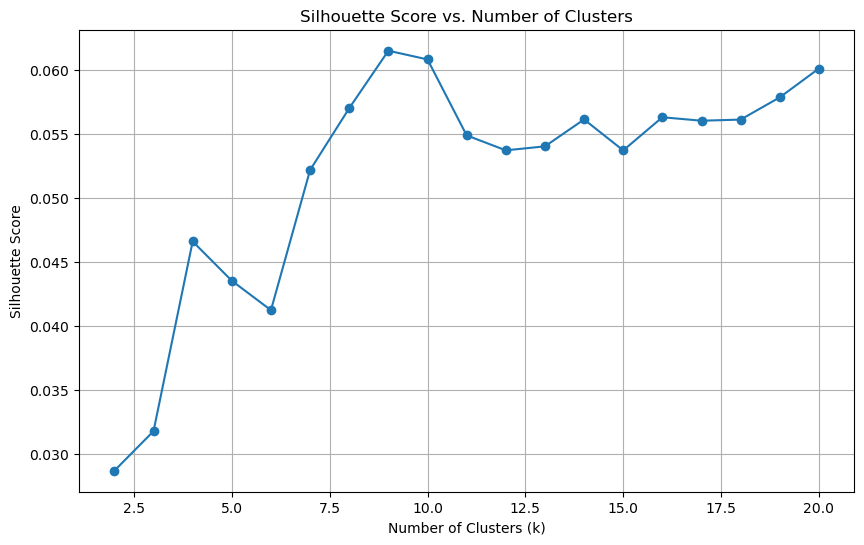

In [8]:
from nltk import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import nltk

nltk.download("punkt_tab")

# Load and tokenize transcript
with open("../gentle/pieman/transcript.txt", "r", encoding="utf-8") as f:
    text = f.read()

sentences = sent_tokenize(text)

# Embed sentences
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(sentences)

# Try clustering for a range of k values
sil_scores = []
k_range = range(2, min(21, len(sentences)))  # can't have more clusters than points

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    sil_scores.append(score)
    print(f"k = {k}, silhouette score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [9]:
k_optimal = 9  # First peak
kmeans = KMeans(n_clusters=k_optimal, random_state=50)
labels = kmeans.fit_predict(embeddings)

# Detect event boundaries
boundaries = [0]
for i in range(1, len(labels)):
    if labels[i] != labels[i - 1]:
        boundaries.append(i)

# Print segments
for i, start in enumerate(boundaries):
    end = boundaries[i + 1] if i + 1 < len(boundaries) else len(sentences)
    segment = " ".join(sentences[start:end])
    print(f"\n--- Event {i+1} ---\n{segment}")


--- Event 1 ---
I began my illustrious career in journalism in the Bronx where I toiled as a hard-boiled reporter for the Ram, the student newspaper at Fordham University. And one day I’m walking toward the campus center and out comes the elusive Dean McGowan, architect of a policy to replace Fordham’s traditionally working- to middle-class students with wealthier, more prestigious ones. So I whip out my notebook and I go up to him and I say, “Dean McGowan, is it true that Fordham University plans to raise tuition substantially above the inflation rate, and if so, wouldn’t that be a betrayal of its mission?” And he stops and looks at me and he says, “Listen up, punk.” And right then, there’s a blur in the corner of my eye which becomes this figure holding a cream pie which becomes the guy standing next to me mashing a cream pie into Dean McGowan’s face.

--- Event 2 ---
And then runs away.

--- Event 3 ---
And the Dean is covered with cream.

--- Event 4 ---
So I give him a moment, an